#  Q.7 Use seaborn library to load `tips` dataset. Find the following from the dataset for the columns `total_bill` and `tip`:

In [17]:
import pandas as pd 
import numpy as np
import seaborn as sns
import statistics as st
from scipy.stats import skew

In [18]:
data = sns.load_dataset('tips')
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
def calculate_skewness(col1,col2):
    print("Skewness:")

    print("total_bill :  ", skew(col1))
    print("tip : ", skew(col2))

In [20]:
calculate_skewness( data["total_bill"],data["tip"])

Skewness:
total_bill :   1.1262346334818638
tip :  1.4564266884221506


In [21]:
def calculate_skewness_and_classify(col1, col2):
  """
  Calculates the skewness for two columns and classifies their distribution.

  Args:
      col1: The first column data.
      col2: The second column data.

  Prints the skewness and classification for each column.
  """

  print("Skewness and Distribution:")
  print("total_bill :", skew(col1))
  if skew(col1) > 0:
    print("  - Positive Skew (distribution leans right)")
  elif skew(col1) < 0:
    print("  - Negative Skew (distribution leans left)")
  else:
    print("  - Approximately Symmetrical")

  print("tip :", skew(col2))
  if skew(col2) > 0:
    print("  - Positive Skew (distribution leans right)")
  elif skew(col2) < 0:
    print("  - Negative Skew (distribution leans left)")
  else:
    print("  - Approximately Symmetrical")


# Load the tips dataset from seaborn
data = sns.load_dataset("tips")

# Analyze skewness and distribution for total_bill and tip
calculate_skewness_and_classify(data["total_bill"], data["tip"])


Skewness and Distribution:
total_bill : 1.1262346334818638
  - Positive Skew (distribution leans right)
tip : 1.4564266884221506
  - Positive Skew (distribution leans right)


In [22]:
def calculate_covariance(col1, col2):
  """
  Calculates the covariance between two columns.

  Args:
      col1: The first column data (assumed to be numerical).
      col2: The second column data (assumed to be numerical).

  Returns:
      The covariance between the two columns.
  """

  # Handle potential errors for non-numeric data
  if not np.issubdtype(col1.dtype, np.number) or not np.issubdtype(col2.dtype, np.number):
    raise TypeError("Columns must contain numerical data.")

  # Calculate the mean of each column
  mean1 = np.mean(col1)
  mean2 = np.mean(col2)

  # Calculate the covariance
  covariance = np.sum((col1 - mean1) * (col2 - mean2)) / (len(col1) - 1)

  return covariance


try:
  covariance = calculate_covariance(data["total_bill"], data["tip"])
  print("Covariance:", covariance)
except TypeError as e:
  print(e)


Covariance: 8.323501629224852


In [31]:
## Using BuiltIn Function
def calculate_covariance(col1, col2):
  """
  Calculates the covariance between two columns (assuming pandas Series).

  Args:
      col1: The first column data (assumed to be a pandas Series).
      col2: The second column data (assumed to be a pandas Series).

  Prints the covariance.

  Returns:
      None (This function only prints results, not returning values).
  """

  # Optional error handling for non-numerical data (using NumPy)
  if not np.issubdtype(col1.dtype, np.number) or not np.issubdtype(col2.dtype, np.number):
    raise TypeError("Columns must contain numerical data.")

  covariance = col1.cov(col2)
  print("Covariance between 'total_bill' and 'tip':", covariance)

# Calculate and print covariance
calculate_covariance(data["total_bill"], data["tip"])


Covariance between 'total_bill' and 'tip': 8.323501629224854


In [33]:
def calculate_correlation(col1, col2):
  """
  Calculates the Pearson correlation coefficient between two columns.

  Args:
      col1: The first column data (assumed to be numerical).
      col2: The second column data (assumed to be numerical).

  Returns:
      The Pearson correlation coefficient between the two columns.
  """

  # Handle potential errors for non-numeric data
  if not np.issubdtype(col1.dtype, np.number) or not np.issubdtype(col2.dtype, np.number):
    raise TypeError("Columns must contain numerical data.")

  correlation = col1.corr(col2)
  return correlation


# Calculate and print correlation
try:
  correlation = calculate_correlation(data["total_bill"], data["tip"])
  print("Pearson Correlation Coefficient:", correlation)
except TypeError as e:
  print(e)


Pearson Correlation Coefficient: 0.6757341092113641


<AxesSubplot: xlabel='total_bill', ylabel='tip'>

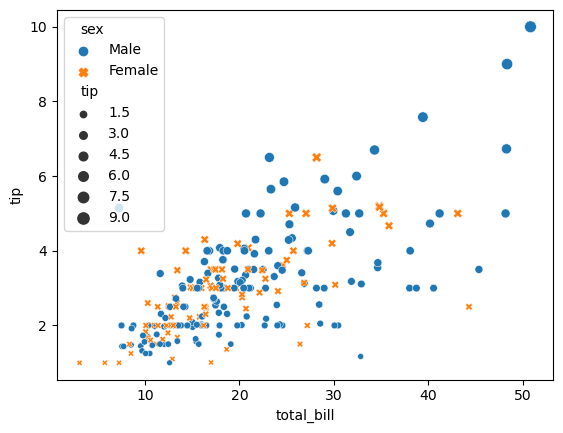

In [36]:
# Specify the columns for visualization
col1 = "total_bill"
col2 = "tip"

# Create a scatter plot
sns.scatterplot(
    x=col1,
    y=col2,
    data=data,
    hue="sex",  # Optional: Add hue to visualize by categorical variable (sex in this case)
    style="sex",  # Optional: Add style to differentiate points by categorical variable
    size="tip",  # Optional: Adjust point size based on a column value (tip here)
)

